# Multiple Linear Regression (LR)

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.linear_model import LinearRegression

Import OSNIR Dataset and shuffle data

In [24]:
# import OSNIR dataset
df = pd.read_csv('../Data/OSNIR_values_extendedv3_new datasetbcsv.csv')
# shuffling rows of OSNIR dataframe and reset indexes
df = df.sample(frac=1)
df.reset_index(inplace=True, drop=True)

Divide data into\
1800 values for training (0,1800-1)\
600 values for validation (1800,2400-1)\
600 values for testing (2400,3000-1)\

In [25]:
data = np.array(df)
# input x aka Ns, Pch, L, B, GB, Nch values
x_train = data[0:1800-1, 1:7]
x_valid = data[1800:2400-1, 1:7]
x_test = data[2400:3000-1, 1:7]

# output y aka OSNIR values
y_train = data[0:1800-1, 0]
y_valid = data[1800:2400-1, 0]
y_test = data[2400:3000-1, 0]

#### Create the Multiple Linear Regression Model

Equation taken into account:\
First Order Polynomial
$$y = b_0 + b_1*x_1 + b_2*x_2 + ... + b_n*x_n$$

where $y$ is the predicted value of the dependent variable,\
$x1$ through $x_n$ are n distinct independent or predictor variables,\
$b_0$ is the value of $y$ when all of the independent values are equal to zero,\
and $b1$ through $b_n$ are the estimated regression coefficients.


In [26]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [27]:
OSNIR_num = data[:3000-1,0]
Input_num = data[:3000-1,1:7]

In [28]:
OSNIR_est = (model.predict(Input_num))

In [29]:
for i in range(10):
    print('%s => %f (expected %f)' % (Input_num[i].tolist(), OSNIR_est[i], OSNIR_num[i] ))

[39.0, -1.0, 50.0, 25.0, 0.0, 3.0] => 15.160725 (expected 15.784997)
[6.0, 0.0, 100.0, 25.0, 0.0, 3.0] => 18.571856 (expected 19.349577)
[7.0, -2.0, 50.0, 50.0, 0.0, 9.0] => 22.288581 (expected 24.274473)
[1.0, 0.0, 10.0, 25.0, 0.0, 3.0] => 30.783691 (expected 35.650000)
[48.0, 3.0, 50.0, 25.0, 12.5, 9.0] => 9.214751 (expected 7.178368)
[7.0, -5.0, 50.0, 25.0, 0.0, 3.0] => 24.145477 (expected 24.616636)
[31.0, -8.0, 100.0, 25.0, 0.0, 9.0] => 9.687208 (expected 6.068574)
[11.0, -3.0, 5.0, 25.0, 0.0, 9.0] => 26.898629 (expected 29.566166)
[6.0, -2.0, 10.0, 25.0, 0.0, 9.0] => 27.747558 (expected 29.196236)
[12.0, -4.0, 50.0, 50.0, 0.0, 9.0] => 20.812744 (expected 20.892185)


In [30]:
Mism = np.zeros(3000-1)
for i in range(3000-1):
    Mism[i] = OSNIR_num[i] - OSNIR_est[i]

In [31]:
pred_df = pd.DataFrame({"Actual OSNIR (dB)" : OSNIR_num.tolist(), "Predicted OSNIR (dB)" : OSNIR_est.tolist(), "Difference (dB)" : Mism.tolist()})
pred_df.to_csv("OSNIR_Prediction_LR.csv",index=False)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00433478, 0.00733578, 0.01100367, 0.01467156, 0.02267422,
        0.02834278, 0.02734245, 0.036012  , 0.06102034, 0.06035345,
        0.07302434, 0.08636212, 0.09903301, 0.08936312, 0.08902968,
        0.07335779, 0.07002334, 0.05335112, 0.03634545, 0.01833945,
        0.01367122, 0.00533511, 0.00700233, 0.00200067, 0.00166722,
        0.00366789, 0.00133378, 0.00166722, 0.00033344, 0.        ]),
 array([-10.        ,  -9.42857143,  -8.85714286,  -8.28571429,
         -7.71428571,  -7.14285714,  -6.57142857,  -6.        ,
         -5.42857143,  -4.85714286,  -4.28571429,  -3.71428571,
         -3.14285714,  -2.57142857,  -2.        ,  -1.42857143,
         -0.85714286,  -0.28571429,   0.28571429,   0.85714286,
          1.42857143,   2.        ,   2.57142857,   3.14285714,
          3.71428571,   4.28571429,   4.85714286,   5.42857143,
          6.        ,   6.57142857,   7.14285714,   7.71428571,
          

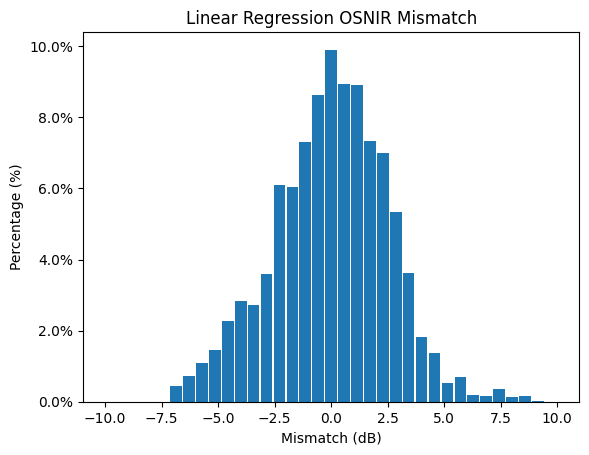

In [34]:
plt.title('Linear Regression OSNIR Mismatch')
plt.xlabel('Mismatch (dB)')
plt.ylabel('Percentage (%)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.hist(Mism, range=(-10,10), rwidth=0.9, bins=35, weights=np.ones(len(Mism))/len(Mism))